# Análisis de sentimiento

## Introducción

Hasta ahora el análisis realizado ha sido muy similar al que se debe realizar a los datos numéricos.

Una de las técnicas que podemos aplicar al análisis de textos es el **Análisis de sentimiento**

Usaremos las siguientes herramientas:

1. **Módulo TextBlob:** A través del cual y mediante palabras ya previamente etiquetadas (en cuanto a sentimiento) extraeremos el sentimiento de cada palabra.  Hay que tener en cuenta, que una misma palabra puede tener sentimiento positivo o negativo en función del contexto (cerveza fría, día frío).
2. **Etiquetas de sentimiento:** Cada palabra en el corpus está etiquetada en términos de polaridad y subjetividad (polarity y subjectivity)
   * **Polaridad**: Cómo de positiva o negativa es una palabra.  -1 muy negativa. +1 muy positiva.
   * **Subjectividad**: Como de subjetivo es el sentimiento de una palabra. 0 no subjetivo. +1 sentimiento muy subjetivo.

Más información acerca de TextBlob [función sentimiento](https://planspace.org/20150607-textblob_sentiment/).



## Sentimiento

In [1]:
#!pip install textblob

In [1]:
# Iniciamos leyendo el corpus generado previamente
import pandas as pd

datos = pd.read_pickle('corpus.pkl')
datos

,transcripcion,nombre_completo
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan
john,"All right, Petunia. Wish me luck out there. Yo...",John Mulaney
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.


In [4]:
# Generamos un par de funciones Lambda para encontrar la polaridad y subjetividad de cada palabra
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

datos['polaridad'] = datos['transcripcion'].apply(pol)     # Aplicamos la función 
datos['subjectividad'] = datos['transcripcion'].apply(sub)
datos

,transcripcion,nombre_completo,polaridad,subjectividad
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.069359,0.482403
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.055237,0.558976
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.016479,0.537016
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham,0.074514,0.539368
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle,-0.002690,0.513958
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj,0.086856,0.460619
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies,0.044224,0.523382
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.004968,0.551628
john,"All right, Petunia. Wish me luck out there. Yo...",John Mulaney,0.082355,0.484137
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.,0.056665,0.515796


/var/folders/3_/bsh490990pv6w7gjtmjv6qy80000gn/T/ipykernel_9165/4125311082.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x+.001, y+.001, datos['nombre_completo'][index], fontsize=10)


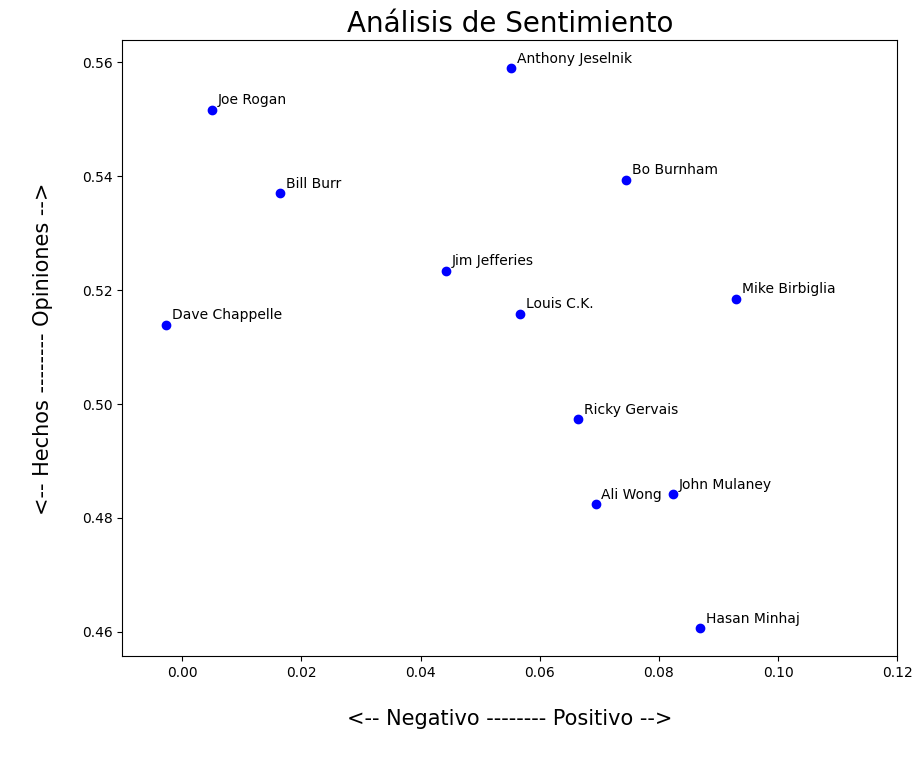

In [7]:
# Pintamos resultados
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comico in enumerate(datos.index):
    x = datos['polaridad'].loc[comico]
    y = datos['subjectividad'].loc[comico]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, datos['nombre_completo'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Análisis de Sentimiento', fontsize=20)
plt.xlabel('\n<-- Negativo -------- Positivo -->\n', fontsize=15)
plt.ylabel('\n<-- Hechos -------- Opiniones -->\n', fontsize=15)

plt.show()

## Análisis de sentimiento a lo largo del tiempo

El análisis de sentimiento ejecutado es sobre el monólogo completo.  Analizamos el sentimiento a lo largo del tiempo.  Para ello, dividimos el monólogo en 10 partes y analizaremos cada una de ellas para ver cómo varía el sentimiento.

In [31]:
# Dividimos cada monologo en 10 partes
import numpy as np
import math

def dividir_texto(texto, n=10):
    '''Divide una cadena de texto en n partes iguales.'''

    # Cálculo de la longitud del texto, el tamaño de cada chunk y el inicio de cada chunk
    long = len(texto)
    tamano = math.floor(long / n)
    inicio = np.arange(0, long, tamano)
    
    # Extracción de porciones de texto del mismo tamaño
    lista = []
    for i in range(n):
        lista.append(texto[inicio[i]:inicio[i]+tamano])
    return lista

In [32]:
# Creamos una lista que contenga todos los chunks de texto
lista_chunks = []
for t in datos['transcripcion']:
    tmp = dividir_texto(t)
    lista_chunks.append(tmp)
    
lista_chunks [1:2]

[['Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my special in San Francisco. Said, “Why would you do that? That’s the most politically correct city in the world.” Not when I’m on stage, it’s not. I love this place. One of my favorite cities to perform in. It’s a good place to hang out. Got to walk around a little bit today. Saw a baby. Saw a baby locked inside the back of a hot car. So it’s been a great day. Love that. Don’t get me wrong. I’m not a monster. I tried to help the baby. Tried to throw a rock through the window. Window was down. Ruined that baby’s whole weekend. It was worth it. I love San Francisco. One of my favorite things is how beautiful all the women are here. Yeah. Women in San Francisco are gorgeous. I say that despite what’s… going on in this crowd tonight. But you guys live here. You guys live here. You’ve seen ’em. I was in a bar last night, saw this beautiful woman. 

In [33]:
# Lista de chunks tiene 12 elementos, uno por cómico
print (len(lista_chunks))
# Cada elemento está compuesto de 10 partes.
print (len(lista_chunks[0]))

12
10


In [34]:
# Calculamos la polaridad de cada parte

transcripcion_polaridad = []
for lch in lista_chunks:
    partes_polaridad = []
    for p in lch:
        partes_polaridad.append(TextBlob(p).sentiment.polarity)
    transcripcion_polaridad.append(partes_polaridad)
    
transcripcion_polaridad

[[0.11168482647296207,
  0.056407029478458055,
  0.09445691155249979,
  0.09236886724386723,
  -0.014671592775041055,
  0.09538361348808912,
  0.06079713127248339,
  0.08721655328798185,
  0.030089690638160044,
  0.07351994851994852],
 [0.13933883477633482,
  -0.06333451704545455,
  -0.056153799903799935,
  0.014602659245516405,
  0.16377334420812684,
  0.09091338259441709,
  0.09420031055900621,
  0.11566683919944787,
  -0.04238582919138478,
  0.058467487373737366],
 [-0.0326152022580594,
  0.006825656825656827,
  0.023452001215159095,
  0.01934081890331888,
  -0.026312183887941466,
  0.06207506613756614,
  0.030250682288725742,
  -0.020351594027441484,
  -0.01150485008818343,
  0.10757491470108295],
 [0.17481829573934843,
  -0.04116923483102918,
  -0.022686011904761886,
  0.019912549136687042,
  0.0592493946731235,
  0.05700242218099361,
  0.04407051282051284,
  0.11019892033865757,
  0.19319944575626394,
  0.23029900332225917],
 [-0.05093449586407334,
  -0.05557354333778966,
  0.035

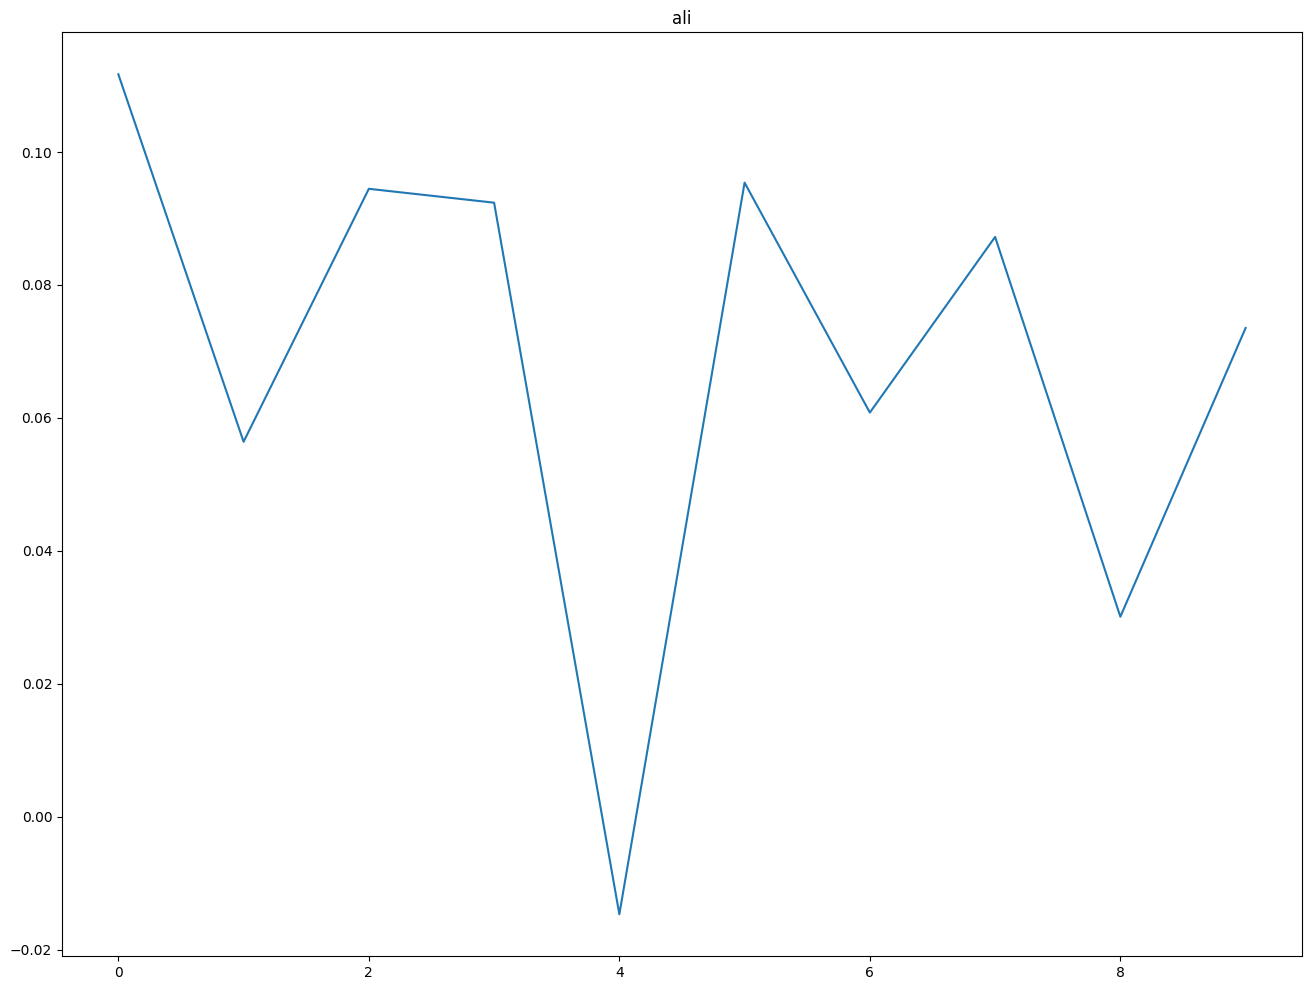

In [35]:
# Pintamos la polaridad para un cómico
plt.plot(transcripcion_polaridad[0])
plt.title(datos['nombre_completo'].index[0])
plt.show()

/var/folders/3_/bsh490990pv6w7gjtmjv6qy80000gn/T/ipykernel_9165/4223467675.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(datos['nombre_completo'][indice])


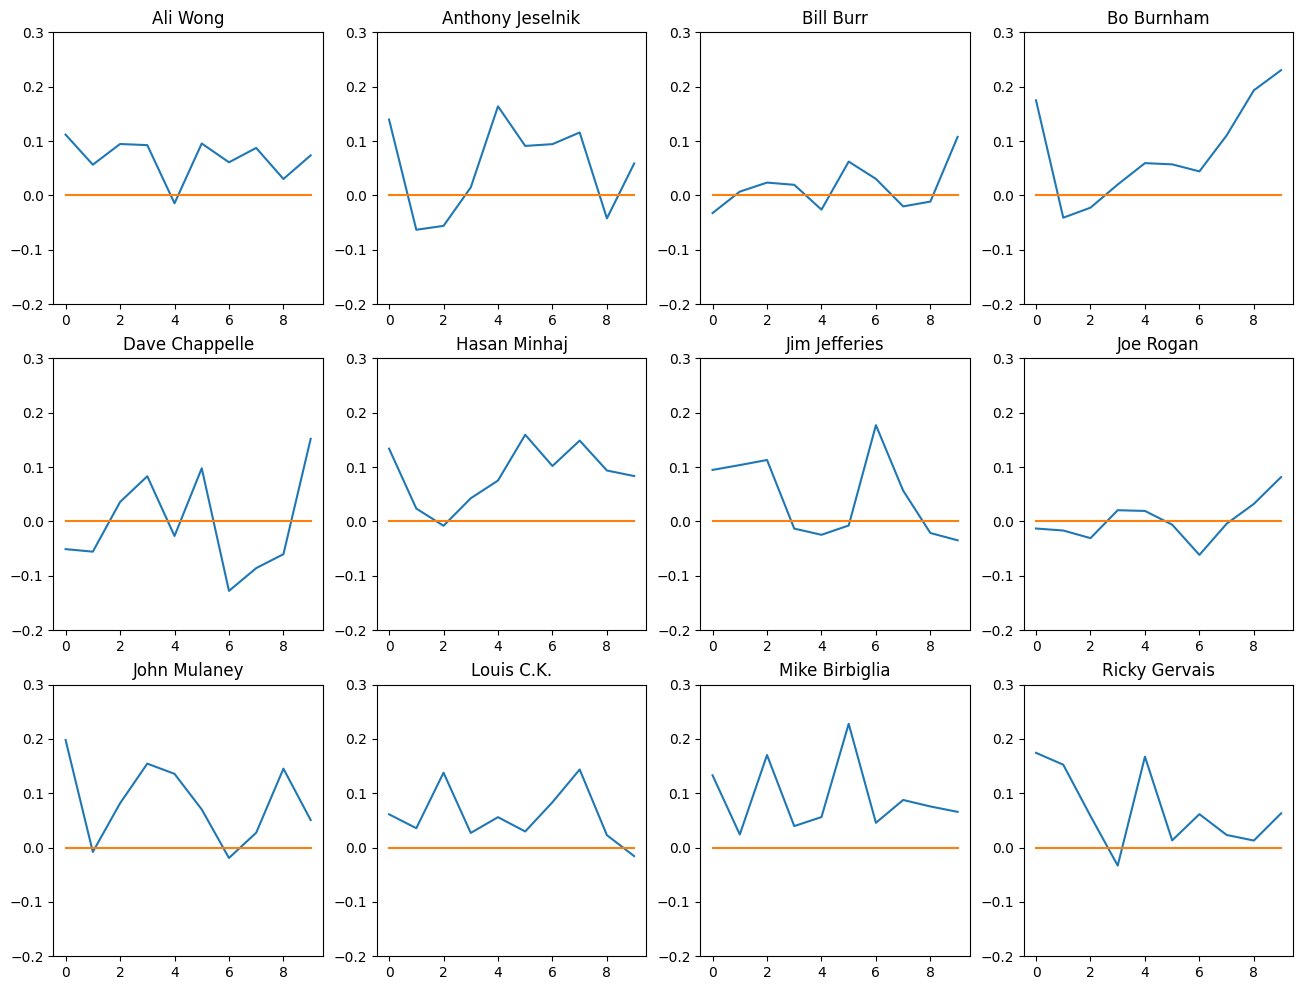

In [37]:
# Pintamos la polaridad para cada cómico
plt.rcParams['figure.figsize'] = [16, 12]

for indice, comico in enumerate(datos.index):    
    plt.subplot(3, 4, indice+1)
    plt.plot(transcripcion_polaridad[indice])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(datos['nombre_completo'][indice])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

---

## Ejercicios

1. Prueba a dividir los monólogos en 5 ó 15 partes para ver si hay cambios en la polaridad obtenida

### Probamos primero con 5 chunks

In [40]:
# Dividimos cada monologo en 10 partes
import numpy as np
import math

def dividir_texto(texto, n=5):
    '''Divide una cadena de texto en n partes iguales.'''

    # Cálculo de la longitud del texto, el tamaño de cada chunk y el inicio de cada chunk
    long = len(texto)
    tamano = math.floor(long / n)
    inicio = np.arange(0, long, tamano)
    
    # Extracción de porciones de texto del mismo tamaño
    lista = []
    for i in range(n):
        lista.append(texto[inicio[i]:inicio[i]+tamano])
    return lista

In [41]:
# Creamos una lista que contenga todos los chunks de texto
lista_chunks = []
for t in datos['transcripcion']:
    tmp = dividir_texto(t)
    lista_chunks.append(tmp)
    
lista_chunks [1:2]

[["Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my special in San Francisco. Said, “Why would you do that? That’s the most politically correct city in the world.” Not when I’m on stage, it’s not. I love this place. One of my favorite cities to perform in. It’s a good place to hang out. Got to walk around a little bit today. Saw a baby. Saw a baby locked inside the back of a hot car. So it’s been a great day. Love that. Don’t get me wrong. I’m not a monster. I tried to help the baby. Tried to throw a rock through the window. Window was down. Ruined that baby’s whole weekend. It was worth it. I love San Francisco. One of my favorite things is how beautiful all the women are here. Yeah. Women in San Francisco are gorgeous. I say that despite what’s… going on in this crowd tonight. But you guys live here. You guys live here. You’ve seen ’em. I was in a bar last night, saw this beautiful woman. 

In [42]:
# Lista de chunks tiene 12 elementos, uno por cómico
print (len(lista_chunks))
# Cada elemento está compuesto de 10 partes.
print (len(lista_chunks[0]))

12
5


In [43]:
# Calculamos la polaridad de cada parte

transcripcion_polaridad = []
for lch in lista_chunks:
    partes_polaridad = []
    for p in lch:
        partes_polaridad.append(TextBlob(p).sentiment.polarity)
    transcripcion_polaridad.append(partes_polaridad)
    
transcripcion_polaridad

[[0.08168912267749477,
  0.09352323320311129,
  0.04082633175081093,
  0.07244664019270318,
  0.056218463672731984],
 [0.049261789522206244,
  -0.026005395570612974,
  0.13049871606958222,
  0.10493357487922708,
  0.012792277840821509],
 [-0.010888352206086215,
  0.02134370259370256,
  0.017201539201539197,
  0.0046237784032848225,
  0.05317299170091049],
 [0.07778041968599034,
  0.00332153062580694,
  0.056517804091333536,
  0.07806175032983954,
  0.20783505103459235],
 [-0.053203957937546065,
  0.06014462764113604,
  0.0409493746993747,
  -0.10652742530412625,
  0.03810051736881004],
 [0.08685746208228225,
  0.01322150421714375,
  0.10969332408592973,
  0.12355614647792566,
  0.08859918566924935],
 [0.09889851641414146,
  0.0473089992974862,
  -0.015473460734155915,
  0.12010213612735536,
  -0.02852324113225277],
 [-0.015053497867743675,
  -0.004880812192988344,
  0.009075543797766024,
  -0.027752145002145,
  0.05772161831904477],
 [0.0943083405284005,
  0.11505157453166304,
  0.1047

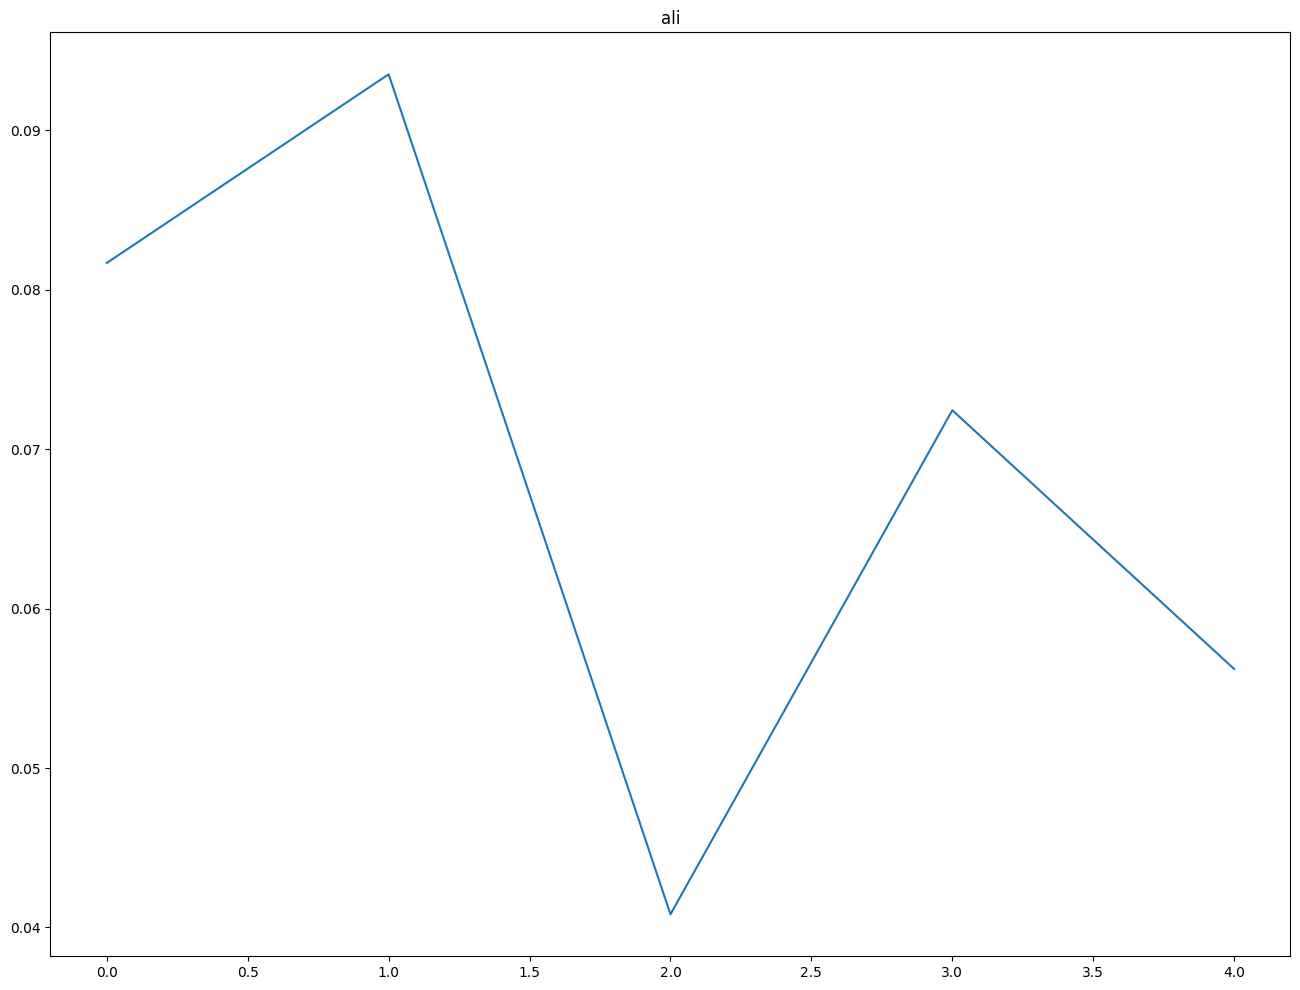

In [44]:
# Pintamos la polaridad para un cómico
plt.plot(transcripcion_polaridad[0])
plt.title(datos['nombre_completo'].index[0])
plt.show()

/var/folders/3_/bsh490990pv6w7gjtmjv6qy80000gn/T/ipykernel_9165/1455337436.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(datos['nombre_completo'][indice])


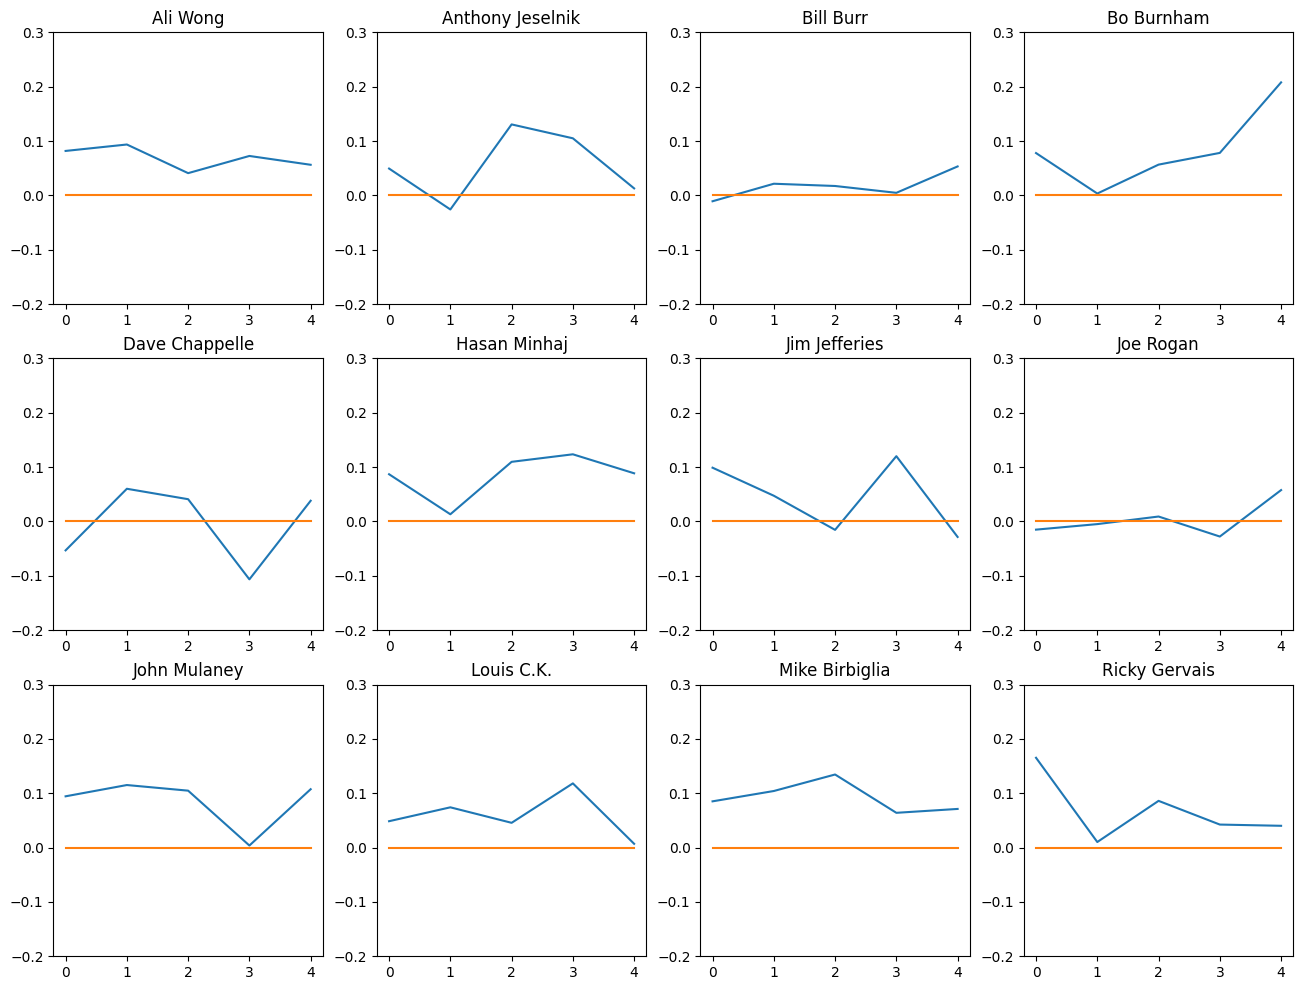

In [45]:
# Pintamos la polaridad para cada cómico
plt.rcParams['figure.figsize'] = [16, 12]

for indice, comico in enumerate(datos.index):    
    plt.subplot(3, 4, indice+1)
    plt.plot(transcripcion_polaridad[indice])
    plt.plot(np.arange(0,5), np.zeros(5))
    plt.title(datos['nombre_completo'][indice])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

---

### Probamos con 15 chunks

In [46]:
# Dividimos cada monologo en 10 partes
import numpy as np
import math

def dividir_texto(texto, n=15):
    '''Divide una cadena de texto en n partes iguales.'''

    # Cálculo de la longitud del texto, el tamaño de cada chunk y el inicio de cada chunk
    long = len(texto)
    tamano = math.floor(long / n)
    inicio = np.arange(0, long, tamano)
    
    # Extracción de porciones de texto del mismo tamaño
    lista = []
    for i in range(n):
        lista.append(texto[inicio[i]:inicio[i]+tamano])
    return lista

In [47]:
# Creamos una lista que contenga todos los chunks de texto
lista_chunks = []
for t in datos['transcripcion']:
    tmp = dividir_texto(t)
    lista_chunks.append(tmp)
    
lista_chunks [1:2]

[['Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my special in San Francisco. Said, “Why would you do that? That’s the most politically correct city in the world.” Not when I’m on stage, it’s not. I love this place. One of my favorite cities to perform in. It’s a good place to hang out. Got to walk around a little bit today. Saw a baby. Saw a baby locked inside the back of a hot car. So it’s been a great day. Love that. Don’t get me wrong. I’m not a monster. I tried to help the baby. Tried to throw a rock through the window. Window was down. Ruined that baby’s whole weekend. It was worth it. I love San Francisco. One of my favorite things is how beautiful all the women are here. Yeah. Women in San Francisco are gorgeous. I say that despite what’s… going on in this crowd tonight. But you guys live here. You guys live here. You’ve seen ’em. I was in a bar last night, saw this beautiful woman. 

In [48]:
# Lista de chunks tiene 12 elementos, uno por cómico
print (len(lista_chunks))
# Cada elemento está compuesto de 10 partes.
print (len(lista_chunks[0]))

12
15


In [49]:
# Calculamos la polaridad de cada parte

transcripcion_polaridad = []
for lch in lista_chunks:
    partes_polaridad = []
    for p in lch:
        partes_polaridad.append(TextBlob(p).sentiment.polarity)
    transcripcion_polaridad.append(partes_polaridad)
    
transcripcion_polaridad

[[0.1449873353596758,
  0.04345238095238095,
  0.04558848362039851,
  0.09863315696649029,
  0.0918700274950275,
  0.08940669763840495,
  0.021568627450980395,
  -0.009169611567570754,
  0.1321370131859562,
  0.08270144628099173,
  0.037771446962623446,
  0.10240015360983101,
  0.0539801036155203,
  0.053245149911816586,
  0.06836080586080585],
 [0.28201356421356416,
  -0.046252705627705636,
  -0.10406197063805761,
  -0.13229847494553382,
  0.1430357142857143,
  -0.015719696969696967,
  0.17435027356902358,
  0.04069940476190475,
  0.1686294261294261,
  0.10827922077922081,
  0.17041871921182264,
  0.03795105820105819,
  -0.1396416900093371,
  0.1105773855773856,
  0.058430134680134665],
 [0.004025597122612046,
  -0.07326940035273373,
  0.043677286255411264,
  0.03790835758048871,
  0.00027188552188551834,
  0.031003742020691137,
  0.010384134714491854,
  -0.04595114087301587,
  0.07537209569818265,
  0.026487531565656548,
  -0.011156937680375192,
  -0.00204256360078279,
  -0.021409438

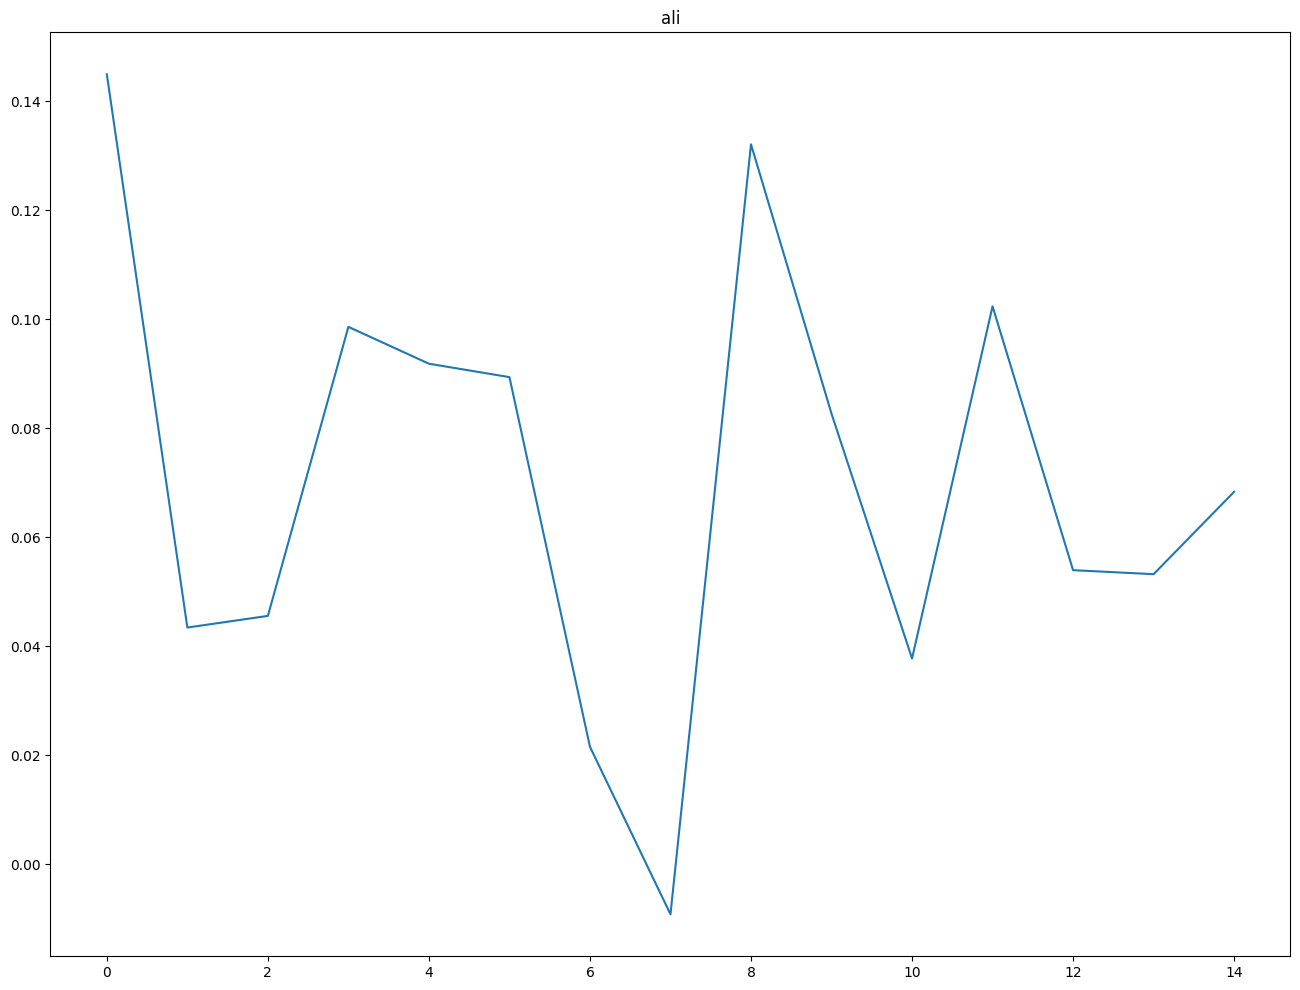

In [50]:
# Pintamos la polaridad para un cómico
plt.plot(transcripcion_polaridad[0])
plt.title(datos['nombre_completo'].index[0])
plt.show()

/var/folders/3_/bsh490990pv6w7gjtmjv6qy80000gn/T/ipykernel_9165/757059770.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(datos['nombre_completo'][indice])


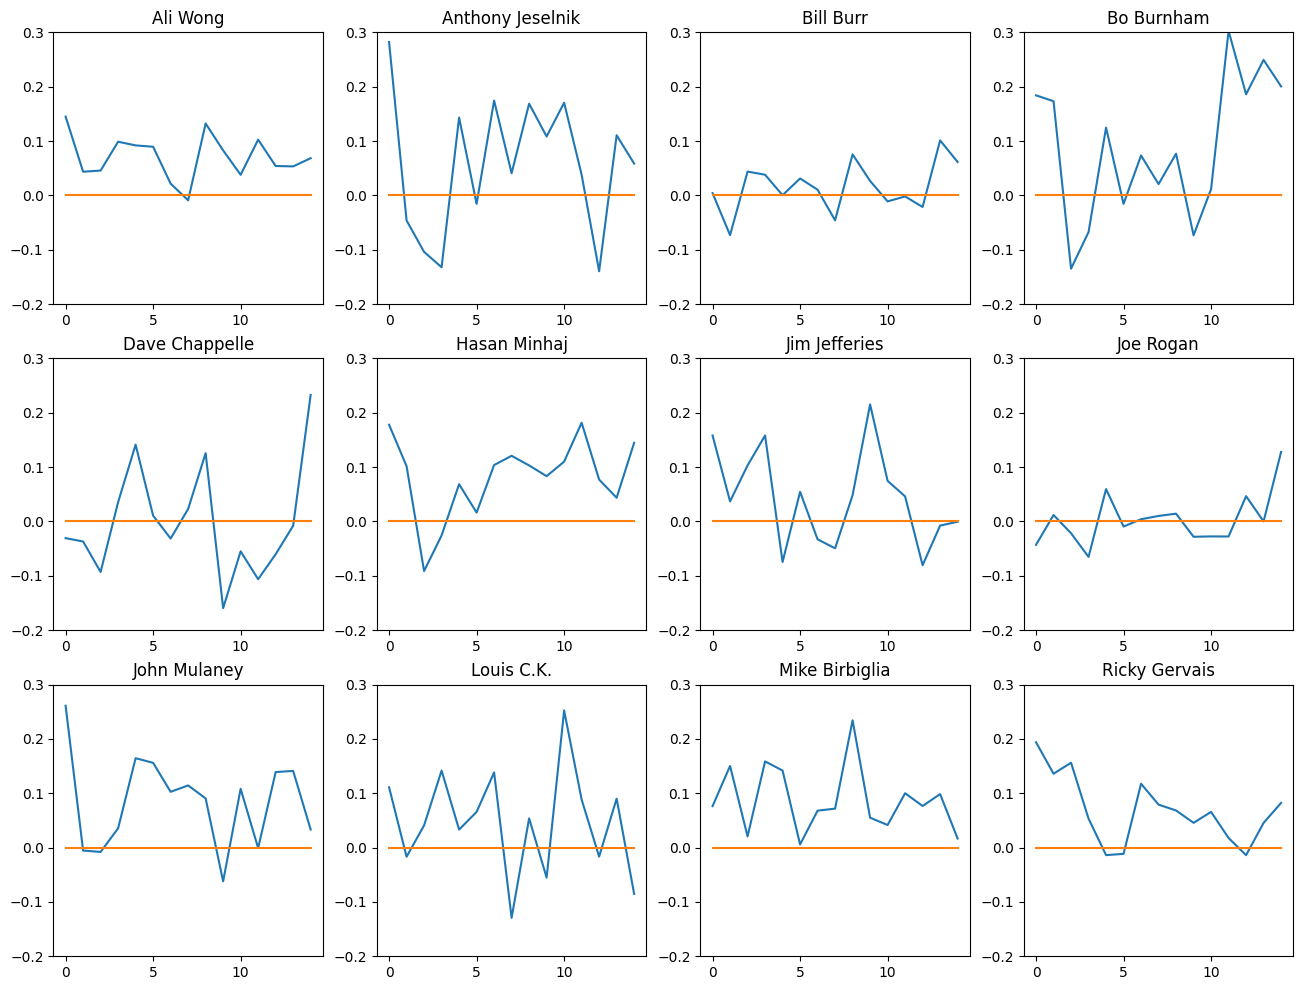

In [51]:
# Pintamos la polaridad para cada cómico
plt.rcParams['figure.figsize'] = [16, 12]

for indice, comico in enumerate(datos.index):    
    plt.subplot(3, 4, indice+1)
    plt.plot(transcripcion_polaridad[indice])
    plt.plot(np.arange(0,15), np.zeros(15))
    plt.title(datos['nombre_completo'][indice])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

---

### Probamos con 25 chunks

In [52]:
# Dividimos cada monologo en 10 partes
import numpy as np
import math

def dividir_texto(texto, n=25):
    '''Divide una cadena de texto en n partes iguales.'''

    # Cálculo de la longitud del texto, el tamaño de cada chunk y el inicio de cada chunk
    long = len(texto)
    tamano = math.floor(long / n)
    inicio = np.arange(0, long, tamano)
    
    # Extracción de porciones de texto del mismo tamaño
    lista = []
    for i in range(n):
        lista.append(texto[inicio[i]:inicio[i]+tamano])
    return lista

In [53]:
# Creamos una lista que contenga todos los chunks de texto
lista_chunks = []
for t in datos['transcripcion']:
    tmp = dividir_texto(t)
    lista_chunks.append(tmp)
    
lista_chunks [1:2]

[['Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my special in San Francisco. Said, “Why would you do that? That’s the most politically correct city in the world.” Not when I’m on stage, it’s not. I love this place. One of my favorite cities to perform in. It’s a good place to hang out. Got to walk around a little bit today. Saw a baby. Saw a baby locked inside the back of a hot car. So it’s been a great day. Love that. Don’t get me wrong. I’m not a monster. I tried to help the baby. Tried to throw a rock through the window. Window was down. Ruined that baby’s whole weekend. It was worth it. I love San Francisco. One of my favorite things is how beautiful all the women are here. Yeah. Women in San Francisco are gorgeous. I say that despite what’s… going on in this crowd tonight. But you guys live here. You guys live here. You’ve seen ’em. I was in a bar last night, saw this beautiful woman. 

In [54]:
# Lista de chunks tiene 12 elementos, uno por cómico
print (len(lista_chunks))
# Cada elemento está compuesto de 10 partes.
print (len(lista_chunks[0]))

12
25


In [55]:
# Calculamos la polaridad de cada parte

transcripcion_polaridad = []
for lch in lista_chunks:
    partes_polaridad = []
    for p in lch:
        partes_polaridad.append(TextBlob(p).sentiment.polarity)
    transcripcion_polaridad.append(partes_polaridad)
    
transcripcion_polaridad

[[0.1857610544217687,
  0.09954212454212454,
  -0.0008771929824561372,
  0.09357142857142857,
  0.017209201388888887,
  0.06954732510288066,
  0.11140109890109888,
  0.1163002305665349,
  -0.0025327812284334133,
  0.1753623188405797,
  0.02236842105263157,
  0.00626293995859213,
  -0.09979166666666667,
  0.0652315857932776,
  0.20051986703772418,
  0.05230555555555554,
  0.10996234668109668,
  0.02943548387096774,
  0.09113455988455987,
  0.08289473684210527,
  0.14149029982363315,
  -0.05355502136752134,
  0.10741496598639454,
  -0.02331029185867896,
  0.16883503401360547],
 [0.3391059403559404,
  0.02588709677419356,
  0.038138528138528145,
  -0.006951003541912624,
  -0.1572004608294931,
  -0.10659013605442179,
  -0.06669146825396828,
  0.2971153846153846,
  0.040000000000000036,
  -0.0864618406285073,
  0.08781362007168457,
  0.27979220779220776,
  0.08832199546485262,
  0.09374999999999999,
  0.10683531746031748,
  0.19791666666666666,
  -0.053447204968944104,
  0.300952380952381,


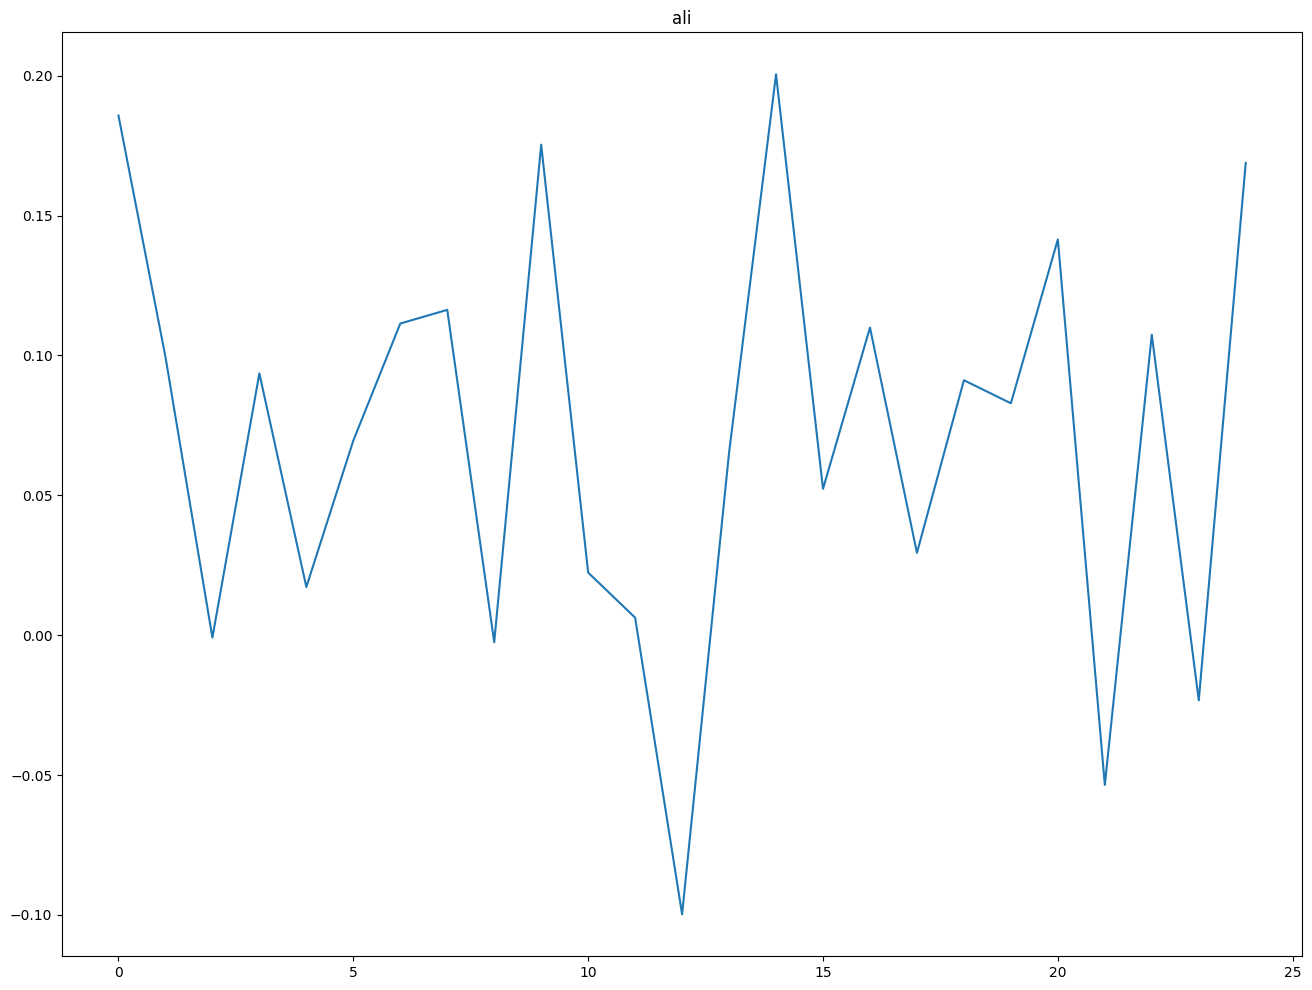

In [56]:
# Pintamos la polaridad para un cómico
plt.plot(transcripcion_polaridad[0])
plt.title(datos['nombre_completo'].index[0])
plt.show()

/var/folders/3_/bsh490990pv6w7gjtmjv6qy80000gn/T/ipykernel_9165/3809410421.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(datos['nombre_completo'][indice])


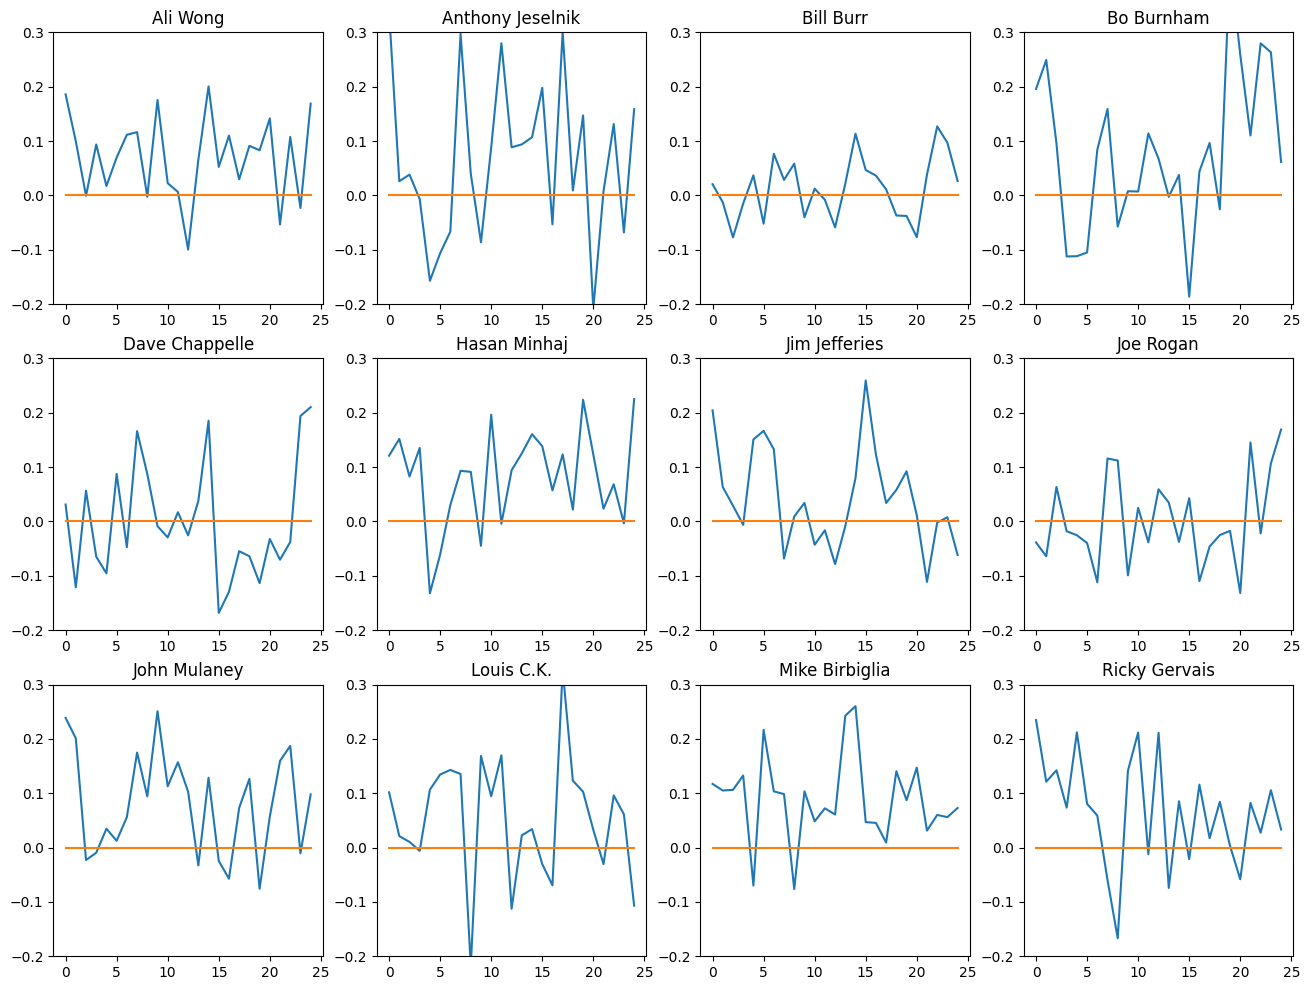

In [57]:
# Pintamos la polaridad para cada cómico
plt.rcParams['figure.figsize'] = [16, 12]

for indice, comico in enumerate(datos.index):    
    plt.subplot(3, 4, indice+1)
    plt.plot(transcripcion_polaridad[indice])
    plt.plot(np.arange(0,25), np.zeros(25))
    plt.title(datos['nombre_completo'][indice])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()